# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

Note: you may need to restart the kernel to use updated packages.


# Imports

In [3]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [9]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# replace with s3 path to your data
df = pd.read_csv("s3://mds-s3-13-vincent/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [10]:
## Use your ML skills to get from step 1 to step 6

In [11]:
df.dropna(inplace=True) #frop rows with nans

In [12]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [13]:
train_df.shape

(36791, 26)

In [14]:
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


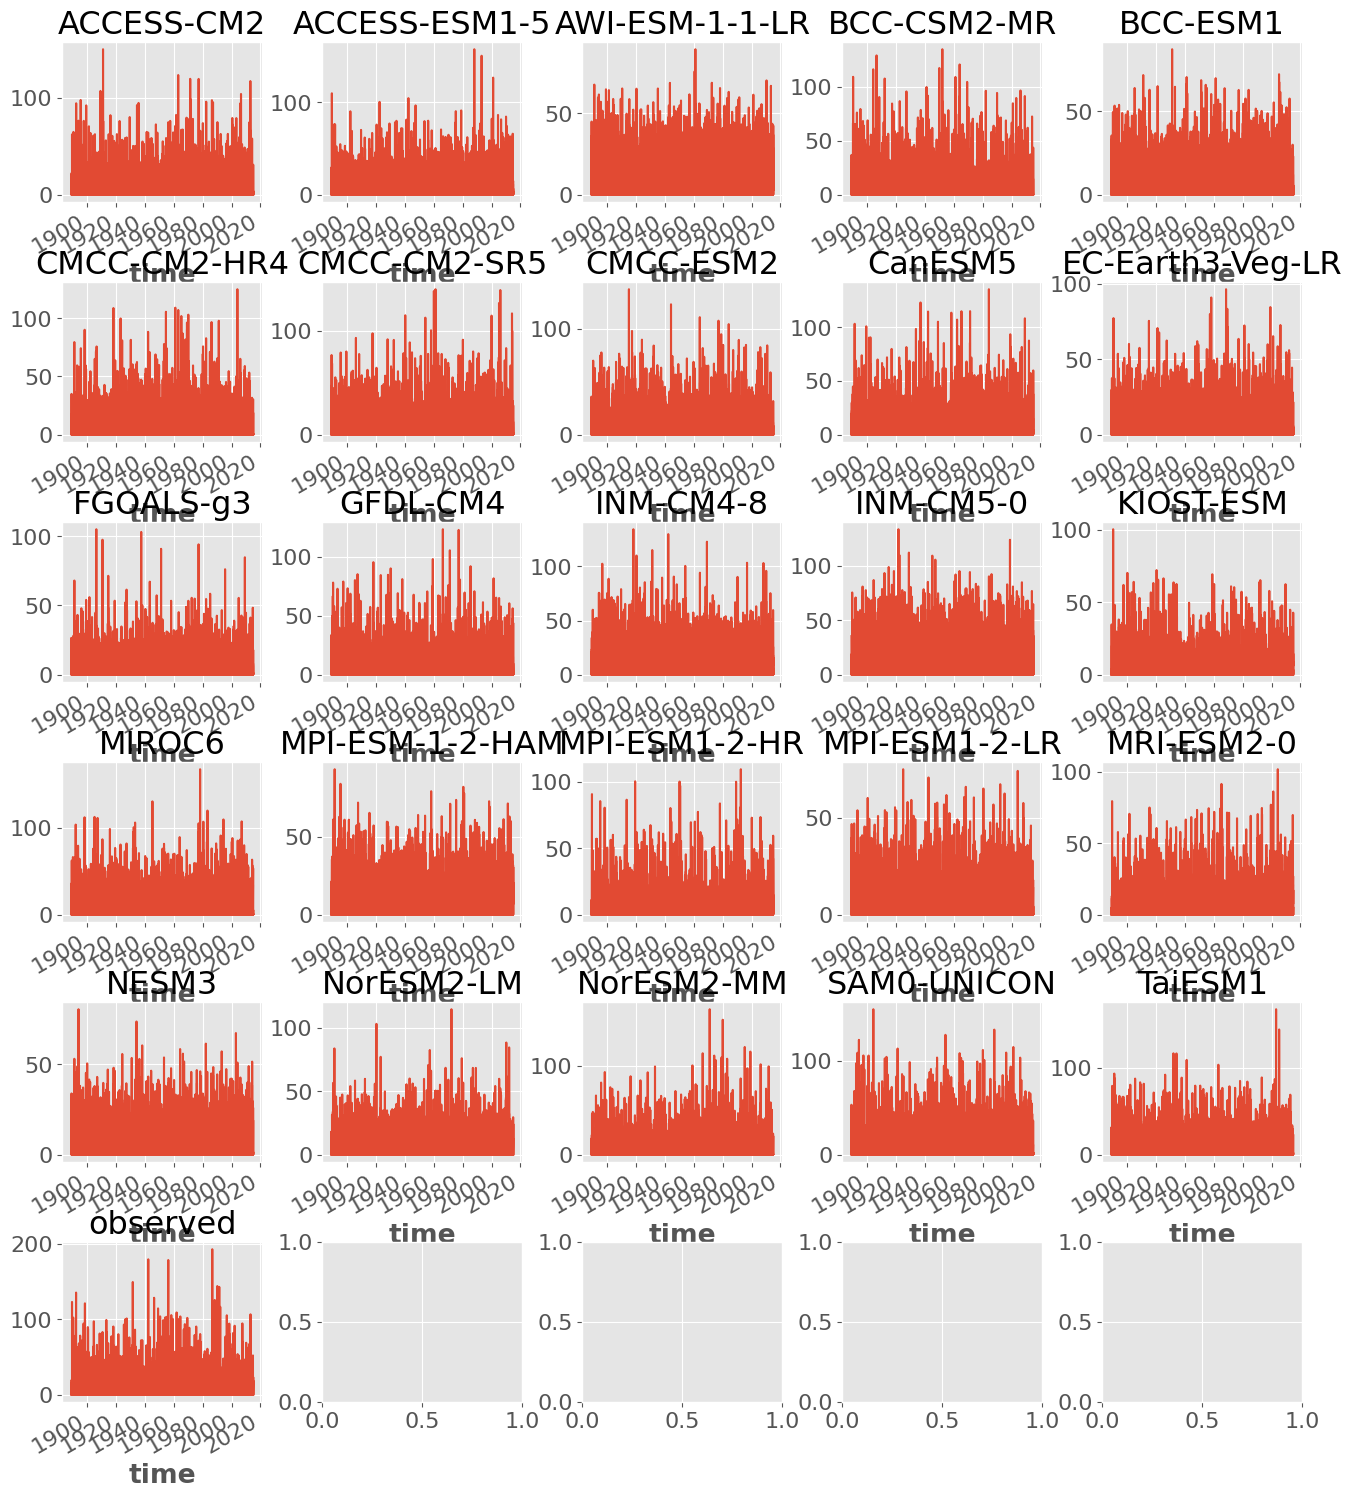

In [15]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(16, 20))

plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, column in enumerate(train_df.columns):
    train_df[[column]].plot(
        title=column,
        ax=axs[i // 5, i % 5],
        legend=False
    )

plt.show()

In [17]:
import warnings
warnings.filterwarnings("ignore")
selected_cols = train_df.iloc[:, :5] # select the first five columns
selected_cols[train_df.columns[-1]] = train_df[train_df.columns[-1]] # adding the observe column
selected_cols.corr().style.background_gradient()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,observed
ACCESS-CM2,1.000000,0.004301,-0.002196,0.001120,0.012212,-0.001819
ACCESS-ESM1-5,0.004301,1.000000,0.002516,-0.000938,0.006826,0.014944
AWI-ESM-1-1-LR,-0.002196,0.002516,1.000000,0.006778,0.001071,0.007980
BCC-CSM2-MR,0.001120,-0.000938,0.006778,1.000000,0.005123,0.019322
BCC-ESM1,0.012212,0.006826,0.001071,0.005123,1.000000,-0.002095
observed,-0.001819,0.014944,0.007980,0.019322,-0.002095,1.000000


In [18]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]   # observed column

# Splitting X and y into train (80%) and test (20%) portions with random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 3.09
Test RMSE: 8.85


In [43]:
for column_name in df.columns[:-1]:
    rmse = np.sqrt(mean_squared_error(df[column_name], df['observed']))
    print(f"RMSE for '{column_name}': {rmse:.2f}")

RMSE for 'ACCESS-CM2': 10.66
RMSE for 'ACCESS-ESM1-5': 10.65
RMSE for 'AWI-ESM-1-1-LR': 10.90
RMSE for 'BCC-CSM2-MR': 10.39
RMSE for 'BCC-ESM1': 10.18
RMSE for 'CMCC-CM2-HR4': 10.41
RMSE for 'CMCC-CM2-SR5': 11.05
RMSE for 'CMCC-ESM2': 10.82
RMSE for 'CanESM5': 10.69
RMSE for 'EC-Earth3-Veg-LR': 10.01
RMSE for 'FGOALS-g3': 9.37
RMSE for 'GFDL-CM4': 10.02
RMSE for 'INM-CM4-8': 11.16
RMSE for 'INM-CM5-0': 11.75
RMSE for 'KIOST-ESM': 9.28
RMSE for 'MIROC6': 11.26
RMSE for 'MPI-ESM-1-2-HAM': 10.68
RMSE for 'MPI-ESM1-2-HR': 9.59
RMSE for 'MPI-ESM1-2-LR': 9.80
RMSE for 'MRI-ESM2-0': 9.67
RMSE for 'NESM3': 9.50
RMSE for 'NorESM2-LM': 10.02
RMSE for 'NorESM2-MM': 10.74
RMSE for 'SAM0-UNICON': 11.39
RMSE for 'TaiESM1': 11.11


From the comparison of the RMSE of ensemble models and other single models, we find that the RMSE of ensemble models perform better since the RMSE is the lowest.  

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [19]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [20]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.65


In [21]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.